In [6]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [7]:
def DE_pendulum(y,time):
    
    g0 = y[1]
    g1 = -np.sin(y[0]) - beta*y[1] + A*np.sin(omegad[index]*time)
    return np.array([g0,g1])



/home/pranav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


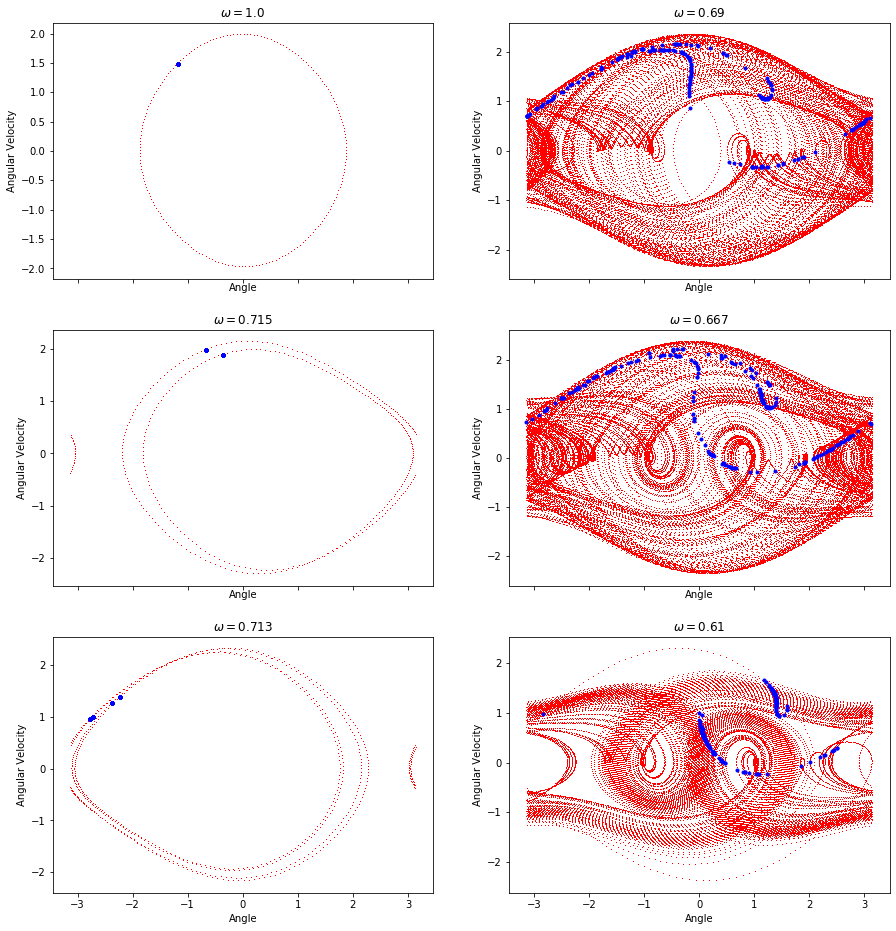

In [9]:
steps = 200
theta0 = np.pi/6.0 #iniital conditions
v0 = 0.0
#omega = 1.0 


beta = 0.5 #damping coefficient
A = 1.2 #amplitude of driving force


omegad = np.array([1,0.715,0.713,0.690,0.667,0.610]) #the driving frequency 

sharex=True
time_step = 2.0* np.pi/(omegad*steps) 

N = 300
skip =100

initial_state = np.array([theta0,v0])

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,16),sharex=True)


x=0
y=0

for index in range(len(omegad)):
    
    time = np.arange(0.0,N*(2.0)*np.pi/omegad[index],time_step[index])
   
    
    answer = odeint(DE_pendulum,initial_state,time)
    answer = answer[skip*steps:]

    for i,position in enumerate(answer[:,0]):
        while position > np.pi:
            position = position - (2.0*np.pi)
        
        while position < -np.pi:
            position = position + (2.0*np.pi)
            
        answer[i,0] = position
    
    offset = 50
    max_index = (N-skip)*steps- offset
    
    
    P_thetas = []
    P_omegas = []

    for j in range(offset,max_index,steps):
        P_thetas.append(answer[j,0])
        P_omegas.append(answer[j,1])
    

    if(index==3):
        x = 0
        y = 1
        axes[x,y].plot(answer[:,0],answer[:,1],"r,")
        axes[x,y].plot(P_thetas,P_omegas,'b.')
        axes[x,y].set_title("$\omega = %s $" %(omegad[index]))
        axes[x,y].set_xlabel("Angle")
        axes[x,y].set_ylabel("Angular Velocity")
        
        
    else:
        axes[x,y].plot(answer[:,0],answer[:,1],"r,")
        axes[x,y].plot(P_thetas,P_omegas,'b.')
        axes[x,y].set_title("omega")
        axes[x,y].set_title("$\omega = %s $" %(omegad[index]))
        axes[x,y].set_xlabel("Angle")
        axes[x,y].set_ylabel("Angular Velocity")
        
    
    x = x+1
    
    
fig.show()
fig.savefig("chaoticpendulumpoincare.eps")